In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   ##引入3D图像

d:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
LR = 0.1
REAL_PARAMS = [1.2, 2.5]
INIT_PARAMS = [[5, 4],
               [5, 1],
               [2, 4.5]][2]

In [3]:
x = np.linspace(-1, 1, 200, dtype=np.float32)   # x data

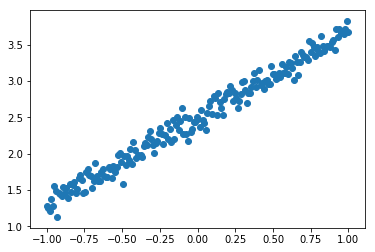

In [5]:
y_fun = lambda a, b: a * x + b  ##生成真实数据
tf_y_fun = lambda a, b: a * x + b  ##用tensorflow来拟合真实数据
'''
这里的lambda就是定义了一个函数
def y_fun(a,b):
     return a*x+b
也就是说lambda可以一句话表示这个函数的定义
'''

noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise         # target,y_fun是我们真实的数据，
                                         #为了看起来真实点，我们还加了些随机噪声

#plt.scatter(x,y)    
#plt.show()

In [6]:
# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)

In [7]:
a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(400):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)    # record parameter changes
        result, _ = sess.run([pred, train_op])                          # training

a= 1.1876291 b= 2.4943755


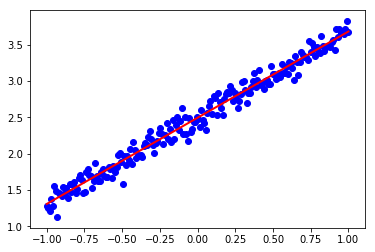

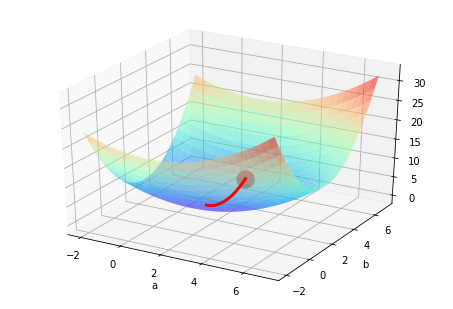

In [8]:
# visualization codes:
print('a=', a_, 'b=', b_)
plt.figure(1)
plt.scatter(x, y, c='b')    # plot data
plt.plot(x, result, 'r-', lw=2)   # plot line fitting
# 3D cost figure
fig = plt.figure(2); ax = Axes3D(fig)
a3D, b3D = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))  # parameter space
cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.5)
ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.plot(a_list, b_list, zs=cost_list, zdir='z', c='r', lw=3)    # plot 3D gradient descent
plt.show()